In [135]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd


path_to_ble_log_folder = '\smart-sensing\\mas-simulation\\sensor-simulation\\log\\experiment-SRA' #\\BLE V5 Mesh
path_to_mas_log_folder = '\smart-sensing\\mas-simulation\\sensor-simulation\\log\\expeiment-DREAM' #\\MAS Agents

In [156]:
ticks=0
e_i =1
e_c =2
e_b =3
n_r = 4
roles_idx = 5

n=10000
count = 0

def get_sensor_data(name):
    ticks = []
    buffer = []
    rolecount = []
    input_energy = []
    consumed_energy = []
    role_count = []
    role_names = []
    
    #ticks	energyInput	energyConsumed	energyInBuffer	energyAllocated	currentlyPlaying	currentTotalBenefit	


    
    with open(path_to_log_folder + '\\runtime_sen_'+ name +'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=';')

        for row in lines:
            #print(len(row))
            if len(row) > 7:
                ticks.append(int(row[0]))
                input_energy.append(float(row[1]))
                consumed_energy.append(float(row[2]))
                buffer.append(float(row[3]))
                role_count.append(int(row[5]))
                role_names.append(row[7])

    return ticks, input_energy, consumed_energy, buffer, role_count, role_names

In [157]:
eff = 1
rwd = 2
def get_actor_data(name):
    x1 = []
    y1 = []
    y2 = []

    #Ticks	Time	Duration	State	Cycles	Updates	Expected	Reward

    with open(path_to_log_folder + '\\runtime_con_'+ name +'.csv','r') as csvfile:
        lines = csv.reader(csvfile, delimiter=';')
        for row in lines:
            #print(len(row))
            if row[0].isnumeric():
                x1.append(int(row[0]))
                y1.append(float(row[5]) / float(row[6]))
                y2.append(float(row[7]))
    return x1,y1,y2

In [158]:
def retrieve_data():
    s1d = get_sensor_data('sen01')
    s1n = "Sensor-01 (EP1)"

    s2d = get_sensor_data('sen02')
    s2n = "Sensor-02 (EP2)"

    s3d = get_sensor_data('sen03')
    s3n = "Sensor-03 (EP3)"

    s4d = get_sensor_data('sen04')
    s4n = "Sensor-04 (Battery-2.5kJ)"

    s5d = get_sensor_data('sen05')
    s5n = "Sensor-05 (Battery-5kJ)"

    sensors = [{"name":s1n, "data":s1d},{"name":s2n, "data":s2d},{"name":s3n, "data":s3d},{"name":s4n, "data":s4d}, {"name":s5n, "data":s5d}]

    a1d = get_actor_data('con01')
    a1n = "Temperature Controller (MP1)"
    a2d = get_actor_data('con02')
    a2n = "Lighting Controller (MP2)"
    a3d = get_actor_data('con03')
    a3n = "Safety Monitor (MP3)"

    actors = [{"name":a1n, "data":a1d},{"name":a2n, "data":a2d},{"name":a3n, "data":a3d}]
    return sensors,actors

In [203]:
path_to_log_folder = path_to_ble_log_folder

sensors,actors = retrieve_data()
efficiencies = []
for sensor in sensors:
    ei = np.sum(sensor["data"][e_i])
    ec = np.sum(sensor["data"][e_c])
    efficiencies.append(ec/ei)

print(pd.DataFrame(efficiencies))

          0
0  0.370410
1  0.317716
2  1.004130
3       inf
4       inf


C:\Users\ramanatg\AppData\Local\Temp\ipykernel_12368\3227585124.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  efficiencies.append(ec/ei)


In [204]:
efficacies = []
for actor in actors:
    efa = np.average(actor["data"][eff])
    efficacies.append(efa)


print(pd.DataFrame(efficacies))

          0
0  0.855936
1  0.915909
2  1.005987


In [205]:
enactments = []
for sensor in sensors:
        count_tc = 0
        count_lc = 0
        count_sm = 0
        roles = sensor["data"][5]
        for r in roles:
            #rint(r)
            if "_TC_" in r:
                count_tc = count_tc + 1
            if "_LC_" in r:
                count_lc = count_lc + 1
            if "_SM_" in r:
                count_sm = count_sm + 1

        total = count_tc +  count_lc + count_sm
        print(count_tc, count_lc, count_sm)
        enactments.append((count_tc, count_lc, count_sm))



tc_total = enactments[0][0] + enactments[1][0] + enactments[2][0] + enactments[3][0] + enactments[4][0]
tc_eh_total = enactments[0][0] + enactments[1][0] + enactments[2][0] 
tc_bp_total = enactments[3][0] + enactments[4][0]

lc_total = enactments[0][1] + enactments[1][1] + enactments[2][1] + enactments[3][1] + enactments[4][1]
lc_eh_total = enactments[0][1] + enactments[1][1] + enactments[2][1] 

sm_total = enactments[0][2] + enactments[1][2] + enactments[2][2] + enactments[3][2] + enactments[4][2]
sm_eh_total = enactments[0][2] + enactments[1][2] + enactments[2][2] 
print("---------------------")
print(tc_eh_total/tc_total, lc_eh_total/lc_total,sm_eh_total/sm_total)


2948 0 3719
2527 0 2539
0 1769 0
0 1727 0
0 450 0
---------------------
1.0 0.4483020780537253 1.0


In [192]:
path_to_log_folder = path_to_mas_log_folder
mas_sensors,mas_actors = retrieve_data()

path_to_log_folder = path_to_ble_log_folder
ble_sensors,ble_actors = retrieve_data()


<Figure size 1440x864 with 0 Axes>

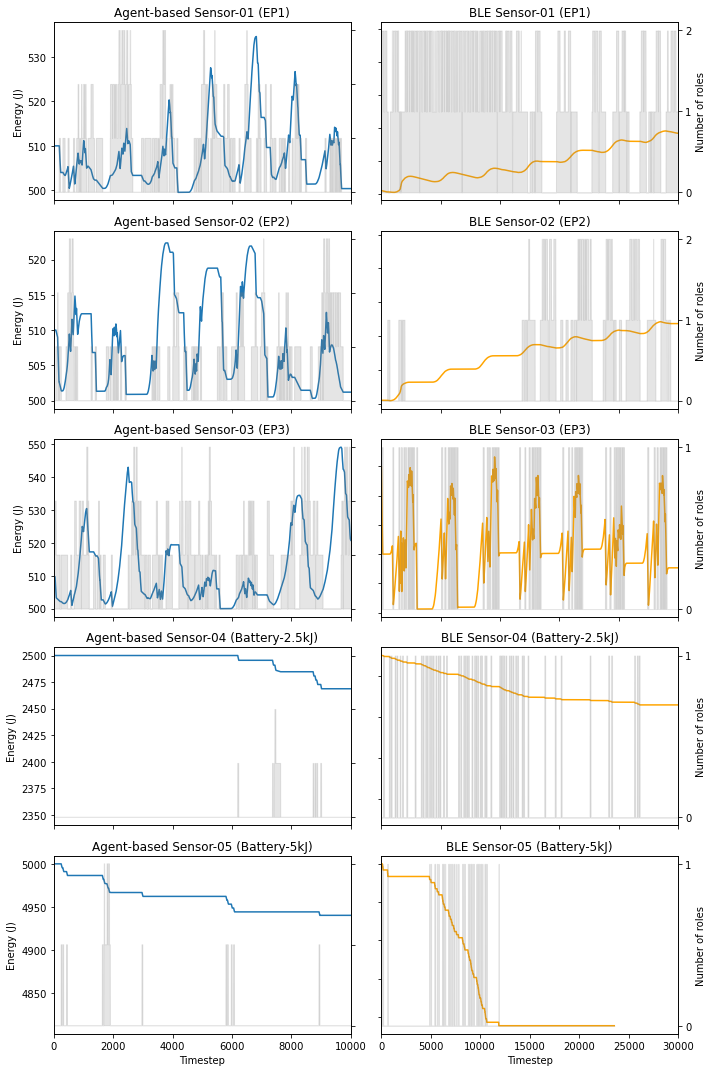

In [196]:

plt.figure(figsize=(20,12))
fig, axs = plt.subplots(5, 2,  figsize=(10, 15))
#fig.suptitle('Status of Sensors and Actuators')
fig.tight_layout(pad=1.0)
i=0;
for sensor in mas_sensors:
    axs[i,0].set_title("Agent-based " + sensor["name"])
    axs[i,0].set_ylabel('Energy (J)')
    axs[i,0].set_xlabel('Timestep')
    axs[i,0].set_xlim([0, 10000])
    axs[i,0].plot(sensor["data"][ticks], sensor["data"][e_b])
    axs2 = axs[i,0].twinx() 
    axs2.set_yticks([0,1,2,3])
    axs2.set_ylabel('Number of roles')
    axs2.fill_between(sensor["data"][ticks],sensor["data"][n_r], color = 'gray', alpha=0.2)
    #axs2.plot(sensor["data"][ticks], sensor["data"][roles], color = 'gray')  
    i = i+1
i=0;
for sensor in ble_sensors:
    axs[i,1].set_title("BLE " + sensor["name"])
    axs[i,1].set_ylabel('Energy (J)')
    axs[i,1].set_xlabel('Timestep')
    axs[i,1].set_xlim([0, 10000])
    axs[i,1].plot(sensor["data"][ticks], sensor["data"][e_b], color = 'orange')
    axs2 = axs[i,1].twinx() 
    axs2.set_yticks([0,1,2,3])
    axs2.set_ylabel('Number of roles')
    axs2.fill_between(sensor["data"][ticks],sensor["data"][n_r], color = 'gray', alpha=0.2)
    #axs2.plot(sensor["data"][ticks], sensor["data"][roles], color = 'gray')  
    i = i+1
#plt.plot(x, y, color = 'g', linestyle = 'dashed',label = "Energy in buffer")
  
#plt.xticks(np.arange(min(x8), max(x8)+1.0, 500.0))
plt.xlim([0, 30000])

for ax in fig.get_axes():
    ax.label_outer()
plt.tight_layout()
plt.savefig('sensors_chart.pdf') 
plt.show()


<Figure size 1440x864 with 0 Axes>

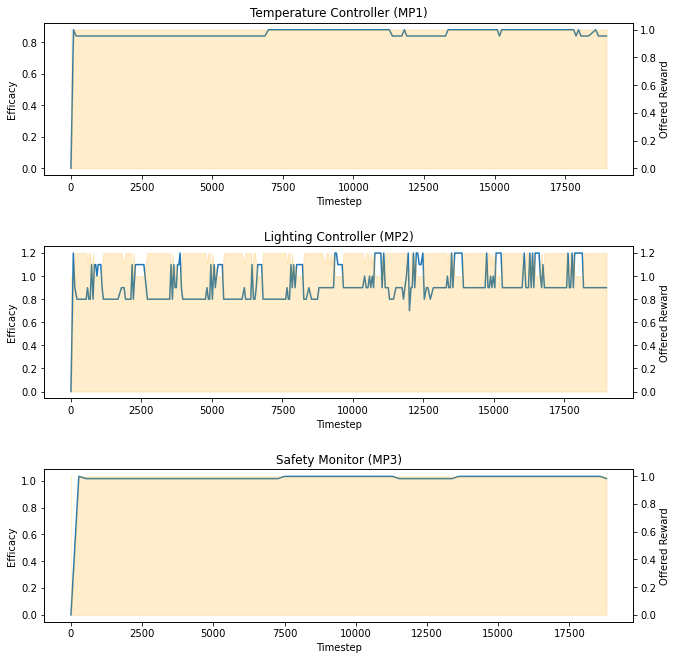

In [32]:
plt.figure(figsize=(20,12))
fig, axs = plt.subplots(3,  figsize=(10, 10))
#fig.suptitle('Status of Sensors and Actuators')
fig.tight_layout(pad=5.0)
i=0;
for actor in actors:
    axs[i].set_title(actor["name"])
    axs[i].set_ylabel('Efficacy')
    axs[i].set_xlabel('Timestep')
    axs[i].plot(actor["data"][ticks], actor["data"][eff])
    axs2 = axs[i].twinx() 
    axs2.set_ylabel('Offered Reward')
    axs2.fill_between(actor["data"][ticks],actor["data"][rwd], color = 'orange', alpha=0.2)
    #axs2.plot(sensor["data"][ticks], sensor["data"][roles], color = 'gray')  
    i = i+1

#plt.plot(x, y, color = 'g', linestyle = 'dashed',label = "Energy in buffer")
  
#plt.xticks(np.arange(min(x8), max(x8)+1.0, 500.0))
plt.savefig('actors_chart.pdf') 
plt.show()
